## Examen 3

1) Determine el espacio de configuraciones: es decir, con todas las condiciones iniciales posibles, en los ejes $(x,v)$, del movimiento horizontal con fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$. $x$ es la posicion y $v$ velocidad. 




In [60]:
import scipy.integrate as integrate
import scipy.optimize as optimize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
def ECD(s,t):
    x,v= s
    m = 0.2 # masa
    b = 0.03 # Coeficiente de amortiguamiento, consideraré hielo/hielo
    k = 1 # [N/m] 
    a = -(b/m)*v-(k/m)*x
    lis = [v,a]
    return lis

In [62]:
Nic = 80
x0s = np.random.uniform(-5,5,Nic)
v0s = np.random.uniform(-8,8,Nic)
tmax = 20


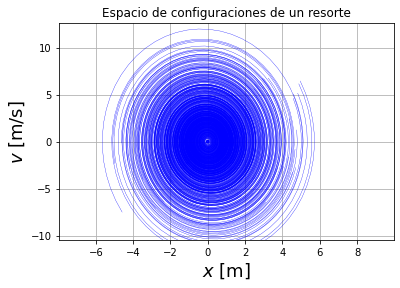

In [74]:
for x0, v0 in zip(x0s, v0s):
    t=np.linspace(0,tmax,400)
    y0=[x0,v0]
    y=integrate.odeint(ECD,y0,t)
    x=y[:,0]
    v=y[:,1]
    plt.plot(x,v,lw = 0.3, color = "blue" )    
#Format of figure
plt.xlabel( "$x$ [m]", fontsize = 18 )
plt.ylabel( "$v$ [m/s]", fontsize = 18 )
plt.xlim( (x0s.min()-3,x0s.max()+5) )
plt.ylim( (v0s.min()-3, v0s.max()+5) )
plt.title( "Espacio de configuraciones de un resorte" )
plt.grid(1)

2) Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

In [64]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [65]:
import numpy as np
import pandas as pd

In [66]:
df=pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')

In [67]:
from scipy import optimize

In [68]:
def N(t, λ):
    N0=1000
    return N0*np.e**(-t*λ)

In [69]:
λarray,Δλarray=optimize.curve_fit(N,df['t'], df['N(t)'])

In [70]:
λ=λarray[0]
Δλ=np.sqrt(Δλarray[0][0])
print(f'Constante de decaimiento: λ = {λ:.5f} ± {Δλ:.5f}')

Constante de decaimiento: λ = 0.02476 ± 0.00036


Valor de vida media

In [71]:
τ = np.log(2)/λ

Error en $τ=a/λ, a=ln2$

$Δy=|df/dy|Δx$

Si $f(x)=a/x$

$Δy=(a/x^2) Δx$

Entonces

$Δτ=τ(Δλ/λ)=(a/λ^2)Δλ$






In [72]:
Δτ = Δλ*np.log(2)/(λ**2)

print(f'La vida media es: τ =  {τ:.2f} ±  {Δτ:.2f}  años')

La vida media es: τ =  27.99 ±  0.41  años


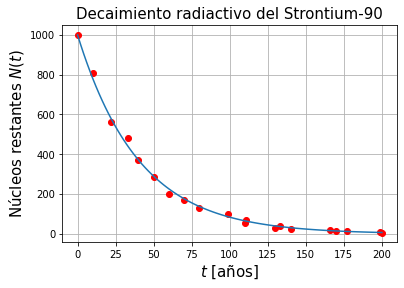

In [73]:
t=linspace(0,200,100)
plt.plot(df.t, df['N(t)'], 'ro')
plt.plot(t, N(t,λ) )

plt.xlabel('$t$ [años]',size=15)
plt.ylabel('Núcleos restantes $N(t)$',size=15)
plt.grid()
plt.title('Decaimiento radiactivo del Strontium-90',size=15)
plt.show()